# PyTorch Computer Vision

## **0.** Computer Vision libraries

* torchvision is the base domain library for PyTorch computer vision
* torchvision.datasets
* torchvision.models
* torchvision.transforms
* torchvission.transforms - Manipulate vision data/ images to be suitable for use with ML model
* torch.utils.data.Dataset - Base dataset class for Pytorch.
* torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [2]:
# Import Pytorch
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


## **1.** Get a dataset

Dataset used for current example: FashionMNIST

In [3]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", #location to download data to
    train = True, # Gets the pre-partitioned training dataset
    download = True, # Do we want to download
    transform = torchvision.transforms.ToTensor(), # Convert images to tensors
    target_transform = None # The label/ target transformation
)

test_data = datasets.FashionMNIST(
    train=False, # Get test dataset
    transform=torchvision.transforms.ToTensor(), # Data to images
    target_transform = None, # No need to change the label/ target values
    root = 'data', # Storage space
    download= True, # Download data to device
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10890680.45it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208864.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3885188.26it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21854531.37it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
label

9

In [6]:
classes_names = train_data.classes
classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
classes_to_idx = train_data.class_to_idx
classes_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets # One tensor with all the labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
print(f"Image shape: {image.shape} -> [Color channels, H, W]")
print(f"Image label: {classes_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [Color channels, H, W]
Image label: Ankle boot


### 1.2 Visualizing data
###### NCHW - Batch size, Color, height, width

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

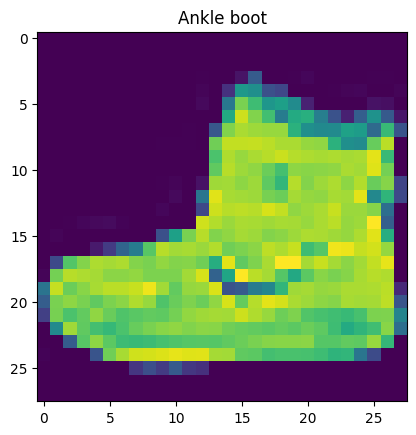

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(classes_names[label])

(-0.5, 27.5, 27.5, -0.5)

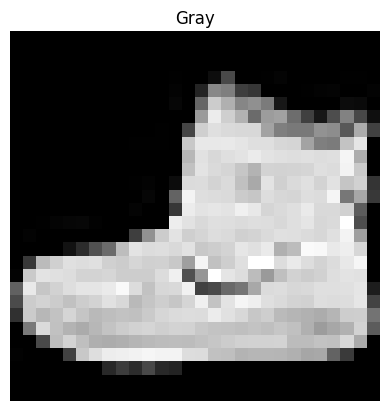

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Gray")
plt.axis(False)

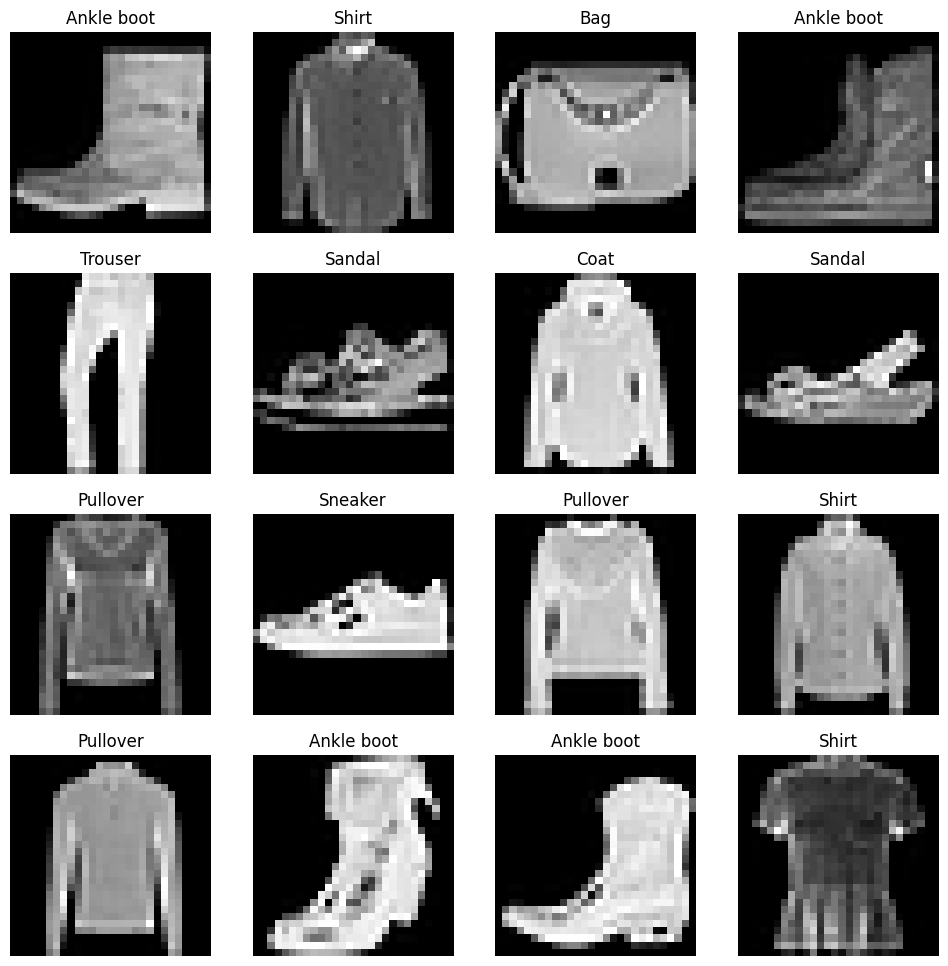

In [12]:
#Plot maore images
# We randomly plot 16 images from the training data
torch.manual_seed(42)
fig = plt.figure(figsize=(12,12))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item() # Get a 1D tensor and extract it out as a integer
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(classes_names[label])
  plt.axis(False)

## **2.** Prepare DataLoader

Right now the our data is in the form of PyTorch Datasets.

DataLoader coverts dataset to python iterable.

We also want to batch the data into segments

* Computationally efficient, as in, your computing hardware may not have memoryview
* Gives NN more chances to update its gradients per epoch (on training 60k images we have one gradient descent, but batching = every 32 images, one gradient descent)

In [13]:
from torch.utils.data import DataLoader  # This is same for text and sound

#Setup batch size
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True, #If all the same class data in the
                              #training set are together, we shuffle it so that
                              #the model does not register the index ranges of
                              #each class and rather only looks at the inherent
                              #patterns within each class
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False, # The model has not seen the test data, so we may not need to shuffle it,
                             )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x787cd7437c40>,
 <torch.utils.data.dataloader.DataLoader at 0x787cd7436c80>)

In [16]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x787cd7437c40>, <torch.utils.data.dataloader.DataLoader object at 0x787cd7436c80>)


In [17]:
print(f"Batches: {len(train_dataloader)}, of size: {BATCH_SIZE}")
print(f"Batches: {len(test_dataloader)}, of size: {BATCH_SIZE}")

Batches: 1875, of size: 32
Batches: 313, of size: 32


In [18]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
# iter is used to transform dataloader into a iterable
# next gets the next batch of the iterable
# there will be 1875 train_features_batch and each of which will have labels of size train_labels_batch
train_features_batch.shape, train_labels_batch.shape
# batch_size, color, height, width; batch_size

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [19]:
train_features_batch[0].shape

torch.Size([1, 28, 28])

Batch number: 6
Image size: torch.Size([1, 28, 28]), label: 6


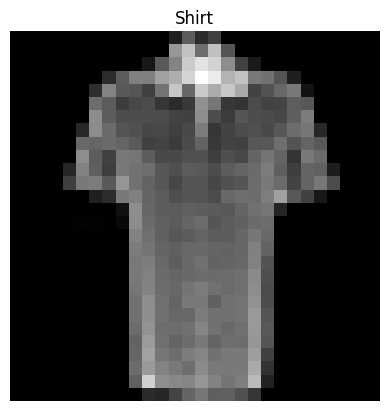

In [ ]:
#Show a asmple
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(classes_names[label])
plt.axis(False)
print(f"Batch number: {random_idx}")
print(f"Image size: {img.shape}, label: {label}")

## **3.** Model 0: Building a baseline model

* We build only a baseline model at first.
* Assess the model
* Change parameters and better it if necessary

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass
# Except for the color channel, all the pixels in the image become a single dimentions array

print(f"Before flatten {x.shape}")  # color, height, width
print(f"After flatten {output.shape}") # color, height * width

Before flatten torch.Size([1, 28, 28])
After flatten torch.Size([1, 784])


In [ ]:
output.squeeze().shape

torch.Size([784])

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input: int, hidden: int, output: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input, out_features=hidden),
        nn.Linear(in_features=hidden, out_features=output),
    )

  def forward(self, x):
      return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(input=784, # 28 * 28
                              hidden=10, # For now
                              output=len(classes_names), # NO of classes
                              ).to('cpu')

In [ ]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape # We do not want this output
# we want one logit per class

torch.Size([1, 10])

In [ ]:
# We can pass in any image, but we need to input number to line up with the output of the flatten layer so that we get the expected 10 logits from the model rather than a weird output shape
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape # One logit per class

torch.Size([1, 10])

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss optimizer and evalutaion metrics

* Loss function - Cross Entropy Loss
* Optimizer - SGD (Shocastic Gradient Descent)
* Evaluation metric - Recall , Precision, Accuracy

In [ ]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download... ")
else:
  print("Downloaading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


Downloaading helper_functions.py


In [ ]:
# IMport accuracy metric
from helper_functions import accuracy_fn

In [ ]:
#Set up loss fucntions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lr=0.1, params=model_0.parameters())

### 3.2 Function to time expriments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
  """
  Prints difference between start and end time.
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# Something
end_time = timer()
print_train_time(start_time, end_time, device='cpu')

Train time on cpu:  0.000 seconds


4.325200001176199e-05

### 3.3 Create a Training loop

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop throught test
4. print it
5. Time it

In [ ]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

# Set teh seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the epochs : Start lower to see if the model is good enough to enhance on
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n -------  ")
  ### Training
  train_loss = 0 # Calc for each batch, sum them, divide by epochs to get per forward pass of whole data

  ################################## BATCH LOOP #####################################################
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader): # X is images and y is labels
    model_0.train()

    #1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # acuumulate train loss for each epoch for all the batches

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward propagation
    loss.backward()

    # 5. optmizer step
    optimizer.step()
    # This line ensures the optimizer changes the parameters each batch, and not just for one epoch.
    # So it would be more fined tune per epoch than using all samples at once

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader) # train loss for one epoch for all the samples

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_preds= model_0(X_test)

      # 2. Loss and accuracy per epoch
      test_loss += loss_fn(test_preds, y_test)
      test_acc += accuracy_fn(y_test, test_preds.argmax(dim=1))
      # We can skip the softmax layer and still get the same output

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    #Claculate teh test acc avg per batch
    test_acc /= len(test_dataloader)

  #Print out what's happening
  print(f"\nTrain loss: {train_loss: .4f},| Test loss {test_loss: .4f} | Test acc: {test_acc: .4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, 'cpu')




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 -------  
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.5904,| Test loss  0.5095 | Test acc:  82.0387
Epoch: 1
 -------  
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4763,| Test loss  0.4799 | Test acc:  83.1969
Epoch: 2
 -------  
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4550,| Test loss  0.4766 | Test acc:  83.4265
Train time on cpu:  27.338 seconds


## **4.** Make predictions and get Model 0 results

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Return a dictionary containg the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      #Make predictions
      y_pred = model(X)

      #loss and accuracy calculation
      loss+= loss_fn(y_pred, y)
      acc+= accuracy_fn(y, y_pred.argmax(dim=1)) # We can skip the softmax layer and still get the same output

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__, # Only works when model was created with a class
          "model_loss" : loss.item(),
          "model_acc" : acc
          }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn= loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## **5.** Setup device agnostic code (for using GPU)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## **6.** Building a better model with non-linearity

In [ ]:
# Model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_features : int, output_features : int, middle_features : int):
    super().__init__()
    self.model_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=middle_features),
        nn.ReLU(),
        nn.Linear(in_features=middle_features, out_features=output_features),
        nn.ReLU()
        )

  def forward(self, x : torch.Tensor):
    return self.model_layer(x)

In [ ]:
#Set seed
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_features=28*28, output_features=len(classes_names), middle_features=10).to(device)

In [ ]:
model_1, next(model_1.parameters()).device

(FashionMNISTModelV1(
   (model_layer): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cuda', index=0))

### 6.1 Setup loss and optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

#loss functions
loss_fn = nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.SGD(lr=0.2, params=model_1.parameters())

### 6.2 Functionizing Testing and Training Loop

In [ ]:
def train_step(model:torch.nn.Module,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim,
               data_loader:torch.utils.data.dataloader,
               accuracy_fn,
               device:torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  model.train()
  #Batch level loop
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    #Predictions
    y_preds = model(X)

    #loss calc
    loss = loss_fn(y_preds, y)
    train_loss += loss

    #accuracy calc
    train_acc += accuracy_fn(y, y_preds.argmax(dim=1))

    #optimizer zero grad
    optimizer.zero_grad()

    #back propagation
    loss.backward()

    #optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Average Train Loss: {train_loss:.5f} | Average Train Accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(model:torch.nn.Module,
              loss_fn:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              accuracy_fn,
              device:torch.device = device):

  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for X,y in data_loader:
      # Device agnostic code
      X , y = X.to(device), y.to(device)

      # Predictions
      y_preds = model(X)

      #loss and accuracy
      test_loss += loss_fn(y_preds, y)
      test_acc += accuracy_fn(y, y_preds.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Average Test Loss: {test_loss:.5f} | Average Test Accuracy: {test_acc:.2f}%")


In [ ]:
torch.manual_seed(42)

# Calculate time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

# Create a loop and call both functions
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n---------")
  train_step(model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             data_loader=train_dataloader,
             accuracy_fn=accuracy_fn)
  test_step(model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            data_loader=test_dataloader)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
---------
Average Train Loss: 0.84771 | Average Train Accuracy: 69.25%
Average Test Loss: 0.74568 | Average Test Accuracy: 73.91%
Epoch: 1 
---------
Average Train Loss: 0.71771 | Average Train Accuracy: 73.84%
Average Test Loss: 0.74081 | Average Test Accuracy: 72.25%
Epoch: 2 
---------
Average Train Loss: 0.68532 | Average Train Accuracy: 74.85%
Average Test Loss: 0.72678 | Average Test Accuracy: 74.05%
Train time on cuda:  32.631 seconds


**NOTE:** Sometimes data on CPU trains faster than GPU, as:
1. Overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. the hardware you're using has a better CPU in terms of compute campability than the GPU

In [ ]:
model_1_resutls = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_1_resutls, model_0_results

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.7267777919769287,
  'model_acc': 74.05151757188499},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499})

## **7.** Model 2: Buildking a Convolutional Neural Network CNN

CNN AKA ConvNets --> known for capabilities to find patterns in visual data

In [ ]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  """Mode architecture that replicates the TinyVGG
  model from CNN explainer website"""

  def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
    super().__init__()
    self.conv_block_1 =  nn.Sequential(
      # Creating a Convolutional neural network
      nn.Conv2d(in_channels=input_shape, #Conv2d for 2D data
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  stride=1,
                  padding=1,
                  kernel_size=3),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=output_shape,
                  stride=1,
                  padding=1,
                  kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # As the output image shape of block 2 is 1, 10, 7, 7
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output after Block 1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output after Block 2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output after classifier: {x.shape}")
    return x

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, #Number of color channels in image. Will be 3 for colored images
                              output_shape=len(classes_names), # Number of classes
                              hidden_units=10 # Got from the website
                              ).to(device)

In [ ]:
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through nn.Conv2d

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64)) # Batch size, color channel, height, width
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Test image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Test image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.79

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
#Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # Single value represents a tuple of same values, Size of the grid that grosses over the image to output smaller image
                       stride=1, # Describes the number of rows each iteration of convolution moves by
                       padding=0, # Pads the edges of a image which lets the model learn patterns on the edge
                       )

# Pass the data through this layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
#Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # Single value represents a tuple of same values, Size of the grid that grosses over the image to output smaller image
                       stride=2, # Describes the number of rows each iteration of convolution moves by
                       padding=0, # Pads the edges of a image which lets the model learn patterns on the edge
                       )

# Pass the data through this layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 31, 31])

In [ ]:
#Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # Single value represents a tuple of same values, Size of the grid that grosses over the image to output smaller image
                       stride=1, # Describes the number of rows each iteration of convolution moves by
                       padding=1, # Pads the edges of a image which lets the model learn patterns on the edge
                       )

# Pass the data through this layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

In [ ]:


#Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=5, # Single value represents a tuple of same values, Size of the grid that grosses over the image to output smaller image
                       stride=1, # Describes the number of rows each iteration of convolution moves by
                       padding=0, # Pads the edges of a image which lets the model learn patterns on the edge
                       )

# Pass the data through this layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 60, 60])

In [ ]:
#Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3, # Single value represents a tuple of same values, Size of the grid that grosses over the image to output smaller image
                       stride=1, # Describes the number of rows each iteration of convolution moves by
                       padding=0, # Pads the edges of a image which lets the model learn patterns on the edge
                       )

# Pass the data through this layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 64, 62, 62])

### 7.2 Stepping through Maxpool 2D

In [ ]:
# Print out the original image shape without unsqueeze
print(f"test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample Maxpool Layer
max_pool_layer = nn.MaxPool2d(kernel_size=2,
                              padding=0,
                              )

# Pass data through the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"{test_image_through_conv.shape}")

# Pass through MaxPool 2d
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"{test_image_through_conv_and_max_pool.shape}")

test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
torch.Size([1, 64, 62, 62])
torch.Size([1, 64, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar numebr of dimentions to our image
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor: {random_tensor}")
print(f"Random tensor Shape: {random_tensor.shape}")

# Pass it through the Max Pool 2D layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Random tensor after Maxpool: {max_pool_tensor}")
print(f"Random tensor Shape after Maxpool layer: {max_pool_tensor.shape}")

Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor Shape: torch.Size([1, 1, 2, 2])
Random tensor after Maxpool: tensor([[[[0.3367]]]])
Random tensor Shape after Maxpool layer: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss and optimizer for Model 2  

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Training and testing `model_2` with functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):

  print(f"Epoch: {epoch}\n------")

  train_step(model=model_2, loss_fn=loss_fn, optimizer=optimizer, data_loader=train_dataloader, accuracy_fn=accuracy_fn, device=device)

  test_step(model=model_2, loss_fn=loss_fn, data_loader=test_dataloader, accuracy_fn=accuracy_fn, device=device)

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Average Train Loss: 0.59831 | Average Train Accuracy: 78.23%
Average Test Loss: 0.39128 | Average Test Accuracy: 85.77%
Epoch: 1
------
Average Train Loss: 0.35714 | Average Train Accuracy: 87.15%
Average Test Loss: 0.33890 | Average Test Accuracy: 87.74%
Epoch: 2
------
Average Train Loss: 0.31974 | Average Train Accuracy: 88.47%
Average Test Loss: 0.32732 | Average Test Accuracy: 88.15%
Train time on cuda:  38.767 seconds


In [ ]:
## Get model 2 results
model_2_results = eval_model(model=model_2,data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3273240029811859,
 'model_acc': 88.14896166134186}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## **8.** Comparing model results and training time


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_resutls,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.726778,74.051518
2,FashionMNISTModelV2,0.327324,88.148962


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.337807
1,FashionMNISTModelV1,0.726778,74.051518,32.631335
2,FashionMNISTModelV2,0.327324,88.148962,38.766540


Text(0, 0.5, 'model')

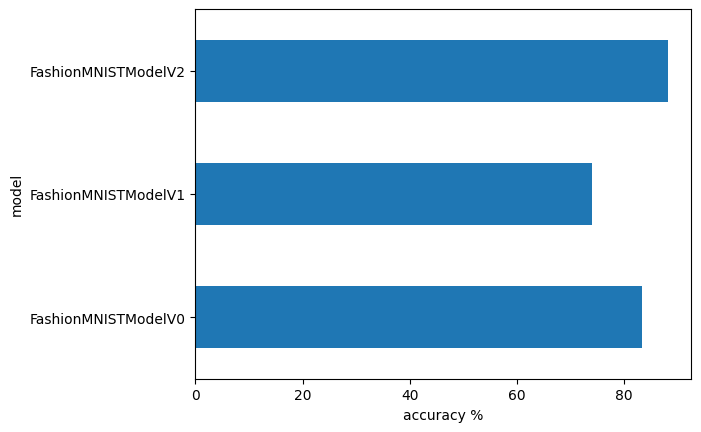

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("accuracy %")
plt.ylabel("model")

## **9.** Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device= device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = sample.unsqueeze(0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get the prediction probabilities for all classes
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for futher calculations
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs) # Make everything in a list format into ONE SINGULAR tensor

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # Number of samples = k
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

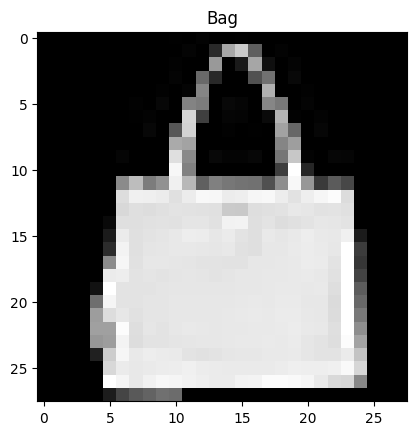

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap = 'gray')
plt.title(classes_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View pred probabilities
pred_probs[:2]

tensor([[1.5677e-06, 2.1176e-07, 1.4927e-05, 1.2798e-04, 8.8023e-04, 1.1583e-05,
         1.5289e-05, 4.0250e-06, 9.9894e-01, 2.0811e-07],
        [9.8357e-07, 4.4910e-07, 2.1344e-06, 1.0642e-06, 7.1649e-06, 4.8850e-04,
         1.9174e-06, 8.9820e-03, 1.4536e-04, 9.9037e-01]])

In [ ]:
# Conver pred prob to labels
pred_labels = pred_probs.argmax(dim=1)
pred_labels, test_labels

(tensor([8, 9, 3, 5, 7, 2, 4, 6, 8]), [8, 9, 3, 5, 7, 2, 4, 6, 8])

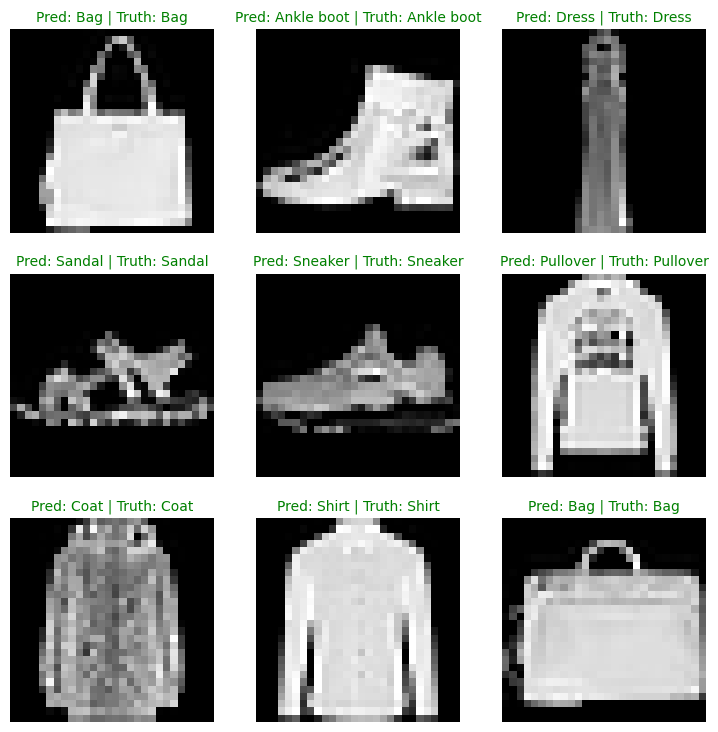

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = classes_names[pred_labels[i]]

  # Truth label
  truth_label = classes_names[test_labels[i]]

  # Title text colored
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)

## **10.** Making a confusion matrix : Multi-Class classification

Use `torchmetrics` package to get the confusion matrix

Plot the confusion matrix `mlxtend.plot_confusion_matrix`

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):
    # Device agnostic code
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_logit = model_2(X)
    # Logits -> Prediction probabilities -> Prediction labels
    y_pred = y_logit.squeeze().softmax(dim=0).argmax(dim=1)

    # Prediction evaluation on CPU
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds) # y preds are all 1D tensors Ex: [1], [2], etc. so we concatinate them into a single tensor
y_pred_tensor[10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor(4)

In [ ]:
!pip install -q torchmetrics -U mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.9 MB/s eta 0:00:00


In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

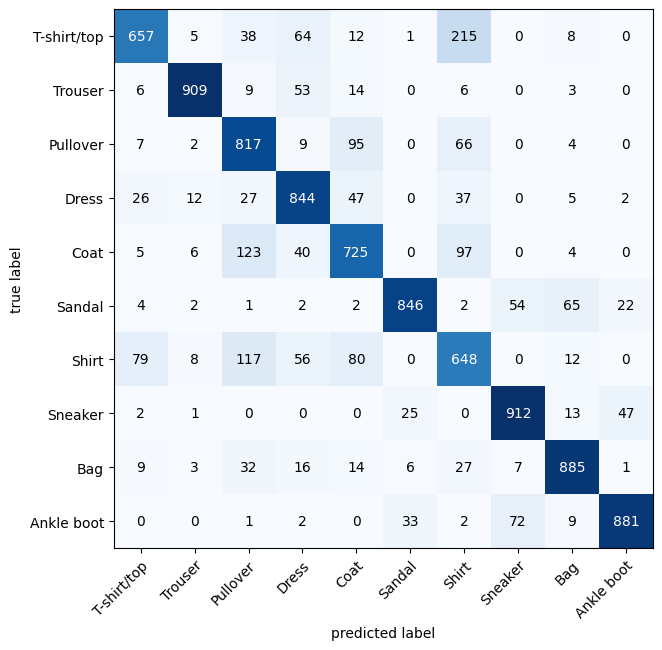

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion instance and compare predictions to targerts
confmat = ConfusionMatrix(num_classes=len(classes_names),task="multiclass")
confmat_tensor = confmat(preds = y_pred_tensor, target= test_data.targets
                         )
# 3.Plot the confucsion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # Matplot lib works with numpy arrays rather then torch tensors
    class_names=classes_names,
    figsize=(10, 7)
)

## **11.** Save and reload model

In [ ]:
from pathlib import Path

#Create path library
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

 # Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/03_pytorch_computer_vision_model_2.pth')

In [ ]:
# Save model statedict
print(f"Savig a model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Savig a model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
## Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1, # Color channels
                                     hidden_units=10, # HIdded layers
                                     output_shape=len(classes_names) # Number of classes
                                     )

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate the loader model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
loaded_model_2_results, model_2_results

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3273240029811859,
  'model_acc': 88.14896166134186},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3273240029811859,
  'model_acc': 88.14896166134186})

In [ ]:
# Check if model results is close
import torch
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-3)

tensor(True)